### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
## Data Collection
import pandas_datareader as pdr
key=""

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=('973a0ad6aeb38500b529c4a85081009c97c34ed5'))

In [4]:
df.to_csv("C:\\Users\\hp\\Downloads\\AAPL.csv")

In [5]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\AAPL.csv")

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-27 00:00:00+00:00,184.16,187.28,184.03,185.23,25285328,43.995583,44.740947,43.964526,44.251205,101141312,0.0,1.0
1,AAPL,2018-06-28 00:00:00+00:00,185.50,186.21,183.80,184.10,17365235,44.315707,44.485326,43.909580,43.981249,69460940,0.0,1.0
2,AAPL,2018-06-29 00:00:00+00:00,185.11,187.19,182.91,186.29,22737666,44.222537,44.719446,43.696960,44.504437,90950664,0.0,1.0
3,AAPL,2018-07-02 00:00:00+00:00,187.18,187.30,183.42,183.82,17731343,44.717057,44.745725,43.818798,43.914358,70925372,0.0,1.0
4,AAPL,2018-07-03 00:00:00+00:00,183.92,187.95,183.54,187.79,13954806,43.938248,44.901009,43.847466,44.862785,55819224,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-06-16 00:00:00+00:00,184.92,186.990,184.2700,186.73,101256225,184.92,186.990,184.2700,186.73,101256225,0.0,1.0
1252,AAPL,2023-06-20 00:00:00+00:00,185.01,186.100,184.4100,184.41,49799092,185.01,186.100,184.4100,184.41,49799092,0.0,1.0
1253,AAPL,2023-06-21 00:00:00+00:00,183.96,185.410,182.5901,184.90,49515697,183.96,185.410,182.5901,184.90,49515697,0.0,1.0
1254,AAPL,2023-06-22 00:00:00+00:00,187.00,187.045,183.6700,183.74,51245327,187.00,187.045,183.6700,183.74,51245327,0.0,1.0
1255,AAPL,2023-06-23 00:00:00+00:00,186.68,187.560,185.0100,185.55,53116996,186.68,187.560,185.0100,185.55,53116996,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       184.16
1       185.50
2       185.11
3       187.18
4       183.92
         ...  
1251    184.92
1252    185.01
1253    183.96
1254    187.00
1255    186.68
Name: close, Length: 1256, dtype: float64

In [10]:
layout = go.Layout(
    title='Stock Prices of AAPL',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

df_data = [{'x':df['date'], 'y':df['close']}]
plot = go.Figure(data=df_data, layout=layout)

In [11]:
iplot(plot)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
df1

0       184.16
1       185.50
2       185.11
3       187.18
4       183.92
         ...  
1251    184.92
1252    185.01
1253    183.96
1254    187.00
1255    186.68
Name: close, Length: 1256, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.19366312]
 [0.19701941]
 [0.19604258]
 ...
 [0.19316218]
 [0.20077646]
 [0.19997495]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(816, 440)

In [18]:
train_data

array([[1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 708ms/step - loss: 0.0352 - val_loss: 6.1675e-04
Epoch 2/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0184 - val_loss: 0.0051
Epoch 3/100
12/12 [==============================] - 5s 404ms/step - loss: 0.0126 - val_loss: 4.8300e-04
Epoch 4/100
12/12 [==============================] - 6s 516ms/step - loss: 0.0101 - val_loss: 4.1361e-04
Epoch 5/100
12/12 [==============================] - 6s 497ms/step - loss: 0.0091 - val_loss: 3.6915e-04
Epoch 6/100
12/12 [==============================] - 6s 480ms/step - loss: 0.0081 - val_loss: 4.7859e-04
Epoch 7/100
12/12 [==============================] - 7s 633ms/step - loss: 0.0082 - val_loss: 0.0016
Epoch 8/100
12/12 [==============================] - 6s 495ms/step - loss: 0.0071 - val_loss: 5.8642e-04
Epoch 9/100
12/12 [==============================] - 5s 398ms/step - loss: 0.0063 - val_loss: 3.8466e-04
Epoch 10/100
12/12 [==============================] - 6s 482ms

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.12.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 72ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

218.2909405653868

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

153.52864983234434

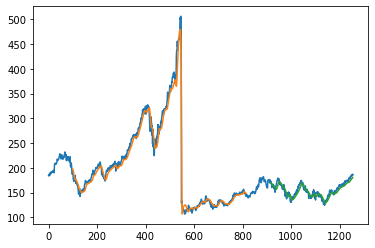

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [48]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.1425673137132

In [51]:
# demonstrate prediction for next 10 days
from numpy import array
    
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.18629213]
101
1 day input [0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

1256

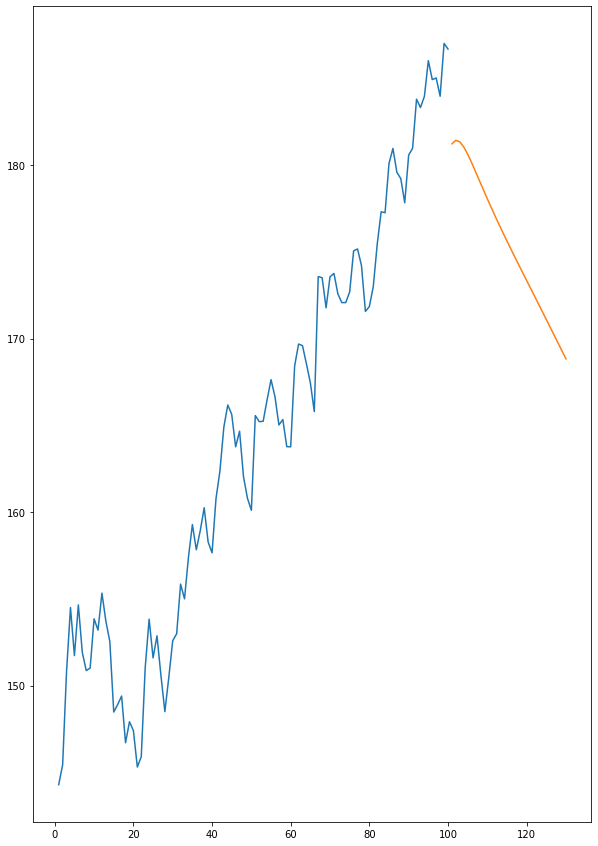

In [57]:
plt.figure(figsize=(10,15))
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

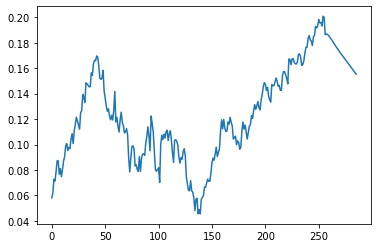

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

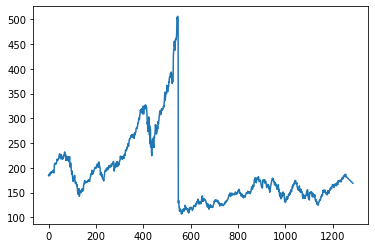

In [60]:
plt.plot(df3)